# Hipothesis - Titles' Success
## Titles Awards

In [1]:
#libraries
library(ggplot2)
library(dplyr) 
library(tidyverse)
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.0.4     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#load datasets

In [3]:
title_basics=read.delim("./../dataset/title_basics_cleaned_withtitle.tsv",header=TRUE)

In [4]:
golden_globes = read.csv("./../dataset/golden_globe_awards.csv",header=TRUE) 

In [5]:
emmy_awards = read.csv("./../dataset/the_emmy_awards.csv",header=TRUE) 

In [6]:
head(title_basics)

tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3
tt0000001,short,Carmencita,0,1894,1,Documentary,Short,0
tt0000002,short,Le clown et ses chiens,0,1892,5,Animation,Short,0
tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,Comedy,Romance
tt0000004,short,Un bon bock,0,1892,12,Animation,Short,0
tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,Short,0
tt0000006,short,Chinese Opium Den,0,1894,1,Short,0,0


In [7]:
head(golden_globes)

year_film,year_award,ceremony,category,nominee,film,win
1943,1944,1,Best Performance by an Actress in a Supporting Role in any Motion Picture,Katina Paxinou,For Whom The Bell Tolls,True
1943,1944,1,Best Performance by an Actor in a Supporting Role in any Motion Picture,Akim Tamiroff,For Whom The Bell Tolls,True
1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
1943,1944,1,Picture,The Song Of Bernadette,,True
1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True
1943,1944,1,Actor In A Leading Role,Paul Lukas,Watch On The Rhine,True


In [8]:
head(emmy_awards)

id,startYear,category,primaryTitle,staff,company,producer,win
1,2019,Outstanding Character Voice-Over Performance,The Simpsons,"Hank Azaria, as Moe, Carl, Duffman, Kirk",FOX,Gracie Films in association with 20th Century Fox Television,False
2,2019,Outstanding Character Voice-Over Performance,Family Guy,"Alex Borstein, as Lois Griffin, Tricia Takanawa",FOX,20th Century Fox Television,False
3,2019,Outstanding Character Voice-Over Performance,When You Wish Upon A Pickle: A Sesame Street Special,"Eric Jacobson, as Bert, Grover, Oscar",HBO,Sesame Street Workshop,False
4,2019,Outstanding Character Voice-Over Performance,F Is For Family,"Kevin Michael Richardson, as Rosie",Netflix,Wild West Television in association with Gaumont Television,False
5,2019,Outstanding Production Design For A Narrative Contemporary Program (One Hour Or More),Escape At Dannemora,"Mark Ricker, Production Designer; James Truesdale, Art Director; Cherish M. Hale, Set Decorator",Showtime,"Red Hour, Busyhands, The White Mountain Company, Michael De Luca Productions, BZ Entertainment",False
6,2019,Outstanding Production Design For A Narrative Contemporary Program (One Hour Or More),Killing Eve,"Laurence Dorman, Production Designer; Beckie Harvey, Art Director; Linda Wilson, Set Decorator",BBC America,Sid Gentle Films Ltd.,False


### Cleaning Emmy Awards and Golden Globes datasets

In [9]:
clean_emmy = emmy_awards
clean_golden = golden_globes

In [10]:
clean_emmy$producer=NULL
clean_emmy$id=NULL
clean_emmy$staff=NULL
clean_emmy$company=NULL
clean_emmy$staff=NULL

In [11]:
clean_emmy$win = as.integer(as.logical(clean_emmy$win))
unique(clean_emmy$win)

[1] 0 1

In [12]:
colnames(clean_emmy) = c("startYear","category_emmy","primaryTitle","win_emmy")

In [13]:
clean_golden$ceremony=NULL
clean_golden$year_award=NULL
clean_golden$win = as.integer(as.logical(clean_golden$win))
unique(clean_golden$win)

[1] 1 0

In [14]:
colnames(clean_golden) = c("startYear","category_gg","nominee","film","win_gg")

### Check how much complementary information we have

In [15]:
# between title basics and emmy awards
titles_year = title_basics %>% select(3,5)

In [16]:
head(titles_year)

primaryTitle,startYear
Carmencita,1894
Le clown et ses chiens,1892
Pauvre Pierrot,1892
Un bon bock,1892
Blacksmith Scene,1893
Chinese Opium Den,1894


In [17]:
nrow(titles_year)

[1] 1231356

In [18]:
summary(as.factor(clean_emmy$win_emmy))

0     1 
16586  4917

In [19]:
titles_year_emmys = left_join(titles_year,clean_emmy,by=c("primaryTitle","startYear"))

In [20]:
head(titles_year_emmys)

primaryTitle,startYear,category_emmy,win_emmy
Carmencita,1894,NA,NA
Le clown et ses chiens,1892,NA,NA
Pauvre Pierrot,1892,NA,NA
Un bon bock,1892,NA,NA
Blacksmith Scene,1893,NA,NA
Chinese Opium Den,1894,NA,NA


In [21]:
nrow(titles_year_emmys)

[1] 1232575

In [22]:
sum(is.na(titles_year_emmys$win_emmy))

[1] 1230693

In [23]:
1329629 - 1327980


[1] 1649

In [24]:
nrow(clean_emmy)

[1] 21503

 - we have 1649 correspondences between our title basics and emmys dataset

In [25]:
# between title basics and golden globes
#first, transform the film column into primary title, 
#adding values of nominee when it is missing
nrow(clean_golden[clean_golden$film=="",])

[1] 1800

In [26]:
nrow(clean_golden)

[1] 7991

In [27]:
#let's separate this dataset into 
#golden globes for people vs. golden globes for movies
clean_gg_films = subset(clean_golden,film == "")
clean_gg_people = subset(clean_golden,film!= "")

In [28]:
nrow(clean_gg_films)

[1] 1800

In [29]:
nrow(clean_gg_people)

[1] 6191

In [30]:
clean_gg_films$film =NULL
colnames(clean_gg_films) = c("startYear","category_gg_film","primaryTitle","win_gg_film")
head(clean_gg_films)

,startYear,category_gg_film,primaryTitle,win_gg_film
4,1943,Picture,The Song Of Bernadette,1
10,1944,Picture,Going My Way,1
17,1945,Picture,The Lost Weekend,1
25,1946,Picture,The Best Years Of Our Lives,1
36,1947,Picture,Gentleman's Agreement,1
47,1948,Picture,Johnny Belinda,1


 - this dataset also contains data from series and tvshows, but these will be erased when merging

In [31]:
titles_year_gg_films = left_join(titles_year,clean_gg_films,by=c("primaryTitle","startYear"))

In [32]:
nrow(titles_year_gg_films)

[1] 1231356

In [33]:
sum(is.na(titles_year_gg_films$win_gg_film))

[1] 1230611

In [34]:
1328553-1327826

[1] 727

 - we have 727 correspondences

In [35]:
head(titles_year_gg_films)

primaryTitle,startYear,category_gg_film,win_gg_film
Carmencita,1894,NA,NA
Le clown et ses chiens,1892,NA,NA
Pauvre Pierrot,1892,NA,NA
Un bon bock,1892,NA,NA
Blacksmith Scene,1893,NA,NA
Chinese Opium Den,1894,NA,NA


In [36]:
#for the peoples dataset
colnames(clean_gg_people) = c("startYear","category_gg_people","nominee","primaryTitle","win_gg_people")
head(clean_gg_people)

,startYear,category_gg_people,nominee,primaryTitle,win_gg_people
1,1943,Best Performance by an Actress in a Supporting Role in any Motion Picture,Katina Paxinou,For Whom The Bell Tolls,1
2,1943,Best Performance by an Actor in a Supporting Role in any Motion Picture,Akim Tamiroff,For Whom The Bell Tolls,1
3,1943,Best Director - Motion Picture,Henry King,The Song Of Bernadette,1
5,1943,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,1
6,1943,Actor In A Leading Role,Paul Lukas,Watch On The Rhine,1
7,1944,Best Performance by an Actress in a Supporting Role in any Motion Picture,Agnes Moorehead,Mrs. Parkington,1


In [37]:
titles_year_gg_people = left_join(titles_year,clean_gg_people,by=c("primaryTitle","startYear"))

In [38]:
nrow(titles_year_gg_people)

[1] 1232826

In [39]:
sum(is.na(titles_year_gg_people$win_gg_people))

[1] 1229693

In [40]:
1330005-1326924

[1] 3081

 - we have 3081 correspondences 

## Now let's merge all this data into one big dataset according to title basics!

In [41]:
titlebasics_emmys = left_join(title_basics,clean_emmy,by=c("primaryTitle","startYear"))

In [42]:
titlebasics_emmys_ggfilms = left_join(titlebasics_emmys,clean_gg_films,by=c("primaryTitle","startYear"))

In [43]:
titlebasics_awards = left_join(titlebasics_emmys_ggfilms,clean_gg_people,by=c("primaryTitle","startYear"))

In [44]:
#verify correspondences
#emmys
nrow(titlebasics_emmys) - sum(is.na(titlebasics_emmys$win_emmy))
#gg films
nrow(titlebasics_emmys_ggfilms) - sum(is.na(titlebasics_emmys_ggfilms$win_gg_film))
#gg people
nrow(titlebasics_awards) - sum(is.na(titlebasics_awards$win_gg_people))

[1] 1882

[1] 1222

[1] 4190

 - repeated values are added at each instance (so we will have multiple instances for same movie but different categories or awards)

In [45]:
head(titlebasics_awards)

tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,category_emmy,win_emmy,category_gg_film,win_gg_film,category_gg_people,nominee,win_gg_people
tt0000001,short,Carmencita,0,1894,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA
tt0000002,short,Le clown et ses chiens,0,1892,5,Animation,Short,0,NA,NA,NA,NA,NA,NA,NA
tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,Comedy,Romance,NA,NA,NA,NA,NA,NA,NA
tt0000004,short,Un bon bock,0,1892,12,Animation,Short,0,NA,NA,NA,NA,NA,NA,NA
tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,Short,0,NA,NA,NA,NA,NA,NA,NA
tt0000006,short,Chinese Opium Den,0,1894,1,Short,0,0,NA,NA,NA,NA,NA,NA,NA


In [46]:
nrow(titlebasics_awards)

[1] 1234535

In [47]:
nrow(title_basics)

[1] 1231356

In [48]:
titlebasics_awards

tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,category_emmy,win_emmy,category_gg_film,win_gg_film,category_gg_people,nominee,win_gg_people
tt0000001,short,Carmencita,0,1894,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA
tt0000002,short,Le clown et ses chiens,0,1892,5,Animation,Short,0,NA,NA,NA,NA,NA,NA,NA
tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,Comedy,Romance,NA,NA,NA,NA,NA,NA,NA
tt0000004,short,Un bon bock,0,1892,12,Animation,Short,0,NA,NA,NA,NA,NA,NA,NA
tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,Short,0,NA,NA,NA,NA,NA,NA,NA
tt0000006,short,Chinese Opium Den,0,1894,1,Short,0,0,NA,NA,NA,NA,NA,NA,NA
tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,1,Short,Sport,0,NA,NA,NA,NA,NA,NA,NA
tt0000008,short,Edison Kinetoscopic Record of a Sneeze,0,1894,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA
tt0000009,movie,Miss Jerry,0,1894,45,Romance,0,0,NA,NA,NA,NA,NA,NA,NA
tt0000010,short,Leaving the Factory,0,1895,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA


 - most of the rows will be of no interest, but now we need to compare with title ratings!

## Do high rated movies get awards ? 

In [49]:
# first - merge titlebasics_awards with title ratings
#load title ratings
title_ratings=read.delim("./../dataset/filtered_title_ratings.tsv",header=TRUE)

In [50]:
nrow(title_ratings)
head(title_ratings)

[1] 423183

tconst,averageRating,numVotes
tt0000001,5.6,1654
tt0000002,6.1,199
tt0000003,6.5,1366
tt0000004,6.2,121
tt0000005,6.2,2149
tt0000006,5.3,115


In [51]:
#the merge will be made by tconst
#we want to keep all the instances in every dataset,
#so we do a fair comparison
title_awards_ratings = full_join(titlebasics_awards,title_ratings,by="tconst")

In [52]:
nrow(title_awards_ratings)

[1] 1251290

In [53]:
1251290-1234535

[1] 16755

 - we have 16 755 more instances than before the merge, this means that 16 755 have ratings instances, but not title basics instances, probably due to cleaning steps, such as removing NA values with no startYear, for instance

In [54]:
head(title_awards_ratings)

tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,category_emmy,win_emmy,category_gg_film,win_gg_film,category_gg_people,nominee,win_gg_people,averageRating,numVotes
tt0000001,short,Carmencita,0,1894,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,5.6,1654
tt0000002,short,Le clown et ses chiens,0,1892,5,Animation,Short,0,NA,NA,NA,NA,NA,NA,NA,6.1,199
tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,Comedy,Romance,NA,NA,NA,NA,NA,NA,NA,6.5,1366
tt0000004,short,Un bon bock,0,1892,12,Animation,Short,0,NA,NA,NA,NA,NA,NA,NA,6.2,121
tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,Short,0,NA,NA,NA,NA,NA,NA,NA,6.2,2149
tt0000006,short,Chinese Opium Den,0,1894,1,Short,0,0,NA,NA,NA,NA,NA,NA,NA,5.3,115


In [55]:
#let's save this dataset for later use (if hypotheses not completed here)
library(readr)
#write_tsv(title_awards_ratings,'merged_title_basics_ratings_awards.tsv') 

### Let's compare the ratings of movies with at least 1 nomination vs. movies with 0 nominations

To do so, we will select from title_awards_ratings only the instances with actual ratings!

In [163]:
#first - let's subset only one instance per tconst
ratings_only = title_awards_ratings
ratings_only = subset(ratings_only, !duplicated(ratings_only$tconst))
ratings_only = subset(ratings_only, numVotes>1000)

In [164]:
nrow(ratings_only)

[1] 34724

In [165]:
ratings_only[complete.cases(ratings_only[,17]),]

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,category_emmy,win_emmy,category_gg_film,win_gg_film,category_gg_people,nominee,win_gg_people,averageRating,numVotes
1,tt0000001,short,Carmencita,0,1894,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,5.6,1654
3,tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,Comedy,Romance,NA,NA,NA,NA,NA,NA,NA,6.5,1366
5,tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,Short,0,NA,NA,NA,NA,NA,NA,NA,6.2,2149
8,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,0,1894,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,5.4,1821
10,tt0000010,short,Leaving the Factory,0,1895,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,6.9,6074
12,tt0000012,short,The Arrival of a Train,0,1896,1,Action,Documentary,Short,NA,NA,NA,NA,NA,NA,NA,7.4,10395
13,tt0000013,short,The Photographical Congress Arrives in Lyon,0,1895,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,5.7,1582
14,tt0000014,short,The Waterer Watered,0,1895,1,Comedy,Short,0,NA,NA,NA,NA,NA,NA,NA,7.1,4649
16,tt0000016,short,Barque sortant du port,0,1895,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,5.9,1210
22,tt0000023,short,The Sea,0,1895,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,5.7,1150


In [166]:
zero_nomination_ratings = ratings_only[is.na(ratings_only$win_emmy & ratings_only$win_gg_film & ratings_only$win_gg_people ),]

In [167]:
nrow(zero_nomination_ratings)

[1] 33530

In [168]:
one_plus_nomination_ratings = ratings_only[!is.na(ratings_only$win_emmy | ratings_only$win_gg_film | ratings_only$win_gg_people ),]

In [169]:
nrow(one_plus_nomination_ratings)

[1] 394

In [170]:
one_plus_winning_ratings = ratings_only[which(ratings_only$win_emmy == 1 | ratings_only$win_gg_film == 1| ratings_only$win_gg_people == 1),]

In [171]:
nrow(one_plus_winning_ratings)

[1] 384

In [172]:
#let's plot the distribution of ratings of these two datasets

In [173]:
head(zero_nomination_ratings)

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,category_emmy,win_emmy,category_gg_film,win_gg_film,category_gg_people,nominee,win_gg_people,averageRating,numVotes
1,tt0000001,short,Carmencita,0,1894,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,5.6,1654
3,tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,Comedy,Romance,NA,NA,NA,NA,NA,NA,NA,6.5,1366
5,tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,Short,0,NA,NA,NA,NA,NA,NA,NA,6.2,2149
8,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,0,1894,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,5.4,1821
10,tt0000010,short,Leaving the Factory,0,1895,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,6.9,6074
12,tt0000012,short,The Arrival of a Train,0,1896,1,Action,Documentary,Short,NA,NA,NA,NA,NA,NA,NA,7.4,10395


In [174]:
mean_rating_zero_nomination =mean(zero_nomination_ratings$averageRating,na.rm=TRUE)
mean_rating_one_plus_nomination =mean(one_plus_nomination_ratings$averageRating,na.rm=TRUE)
mean_rating_one_plus_winning =mean(one_plus_winning_ratings$averageRating,na.rm=TRUE)

In [175]:
xs = c("0","1","2")
means = c(mean_rating_zero_nomination,mean_rating_one_plus_nomination,mean_rating_one_plus_winning)
means_df = data.frame(xs,means)

In [176]:
means_df

xs,means
0,6.368330
1,7.387563
2,7.392448


In [181]:
plot_dist = qplot()+
geom_violin(data=zero_nomination_ratings, aes(x="0",y=averageRating),fill="skyblue1",color="skyblue1")+
geom_boxplot(data=zero_nomination_ratings, aes(x="0",y=averageRating),width=0.6,fill="white",color="black")+
geom_violin(data=one_plus_nomination_ratings,aes(x="1",y=averageRating),fill="skyblue2",color="skyblue2")+
geom_boxplot(data=one_plus_nomination_ratings,aes(x="1",y=averageRating),width=0.2,fill="white",color="black")+
geom_violin(data=one_plus_winning_ratings,aes(x="2",y=averageRating),fill="skyblue3",color="skyblue3")+
geom_boxplot(data=one_plus_winning_ratings,aes(x="2",y=averageRating),width=0.17,fill="white",color="black")+
geom_point(data=means_df,aes(x=xs,y=means,color="red4",size=4,),show.legend = FALSE)+
geom_text(data=means_df,aes(x=xs,y=means,label=round(means_df$means,digits=2)),hjust=0.5, vjust=-1)+
geom_line(data=means_df,aes(x=xs,y=means,color="red4"),group=1,show.legend = FALSE)+
scale_x_discrete(labels=c("2"="≥1 Wins \n (384)","1"="≥1 Nominations \n (394)","0"="0 Nominations \n (33 530)"))+
scale_y_continuous(breaks=seq(0,10,1))+
labs(y=expression("Average Rating"),x="")+
theme_bw(base_size = 19)+
theme(axis.text.y = element_text(angle = 90, vjust = 0.5, hjust=0.5))

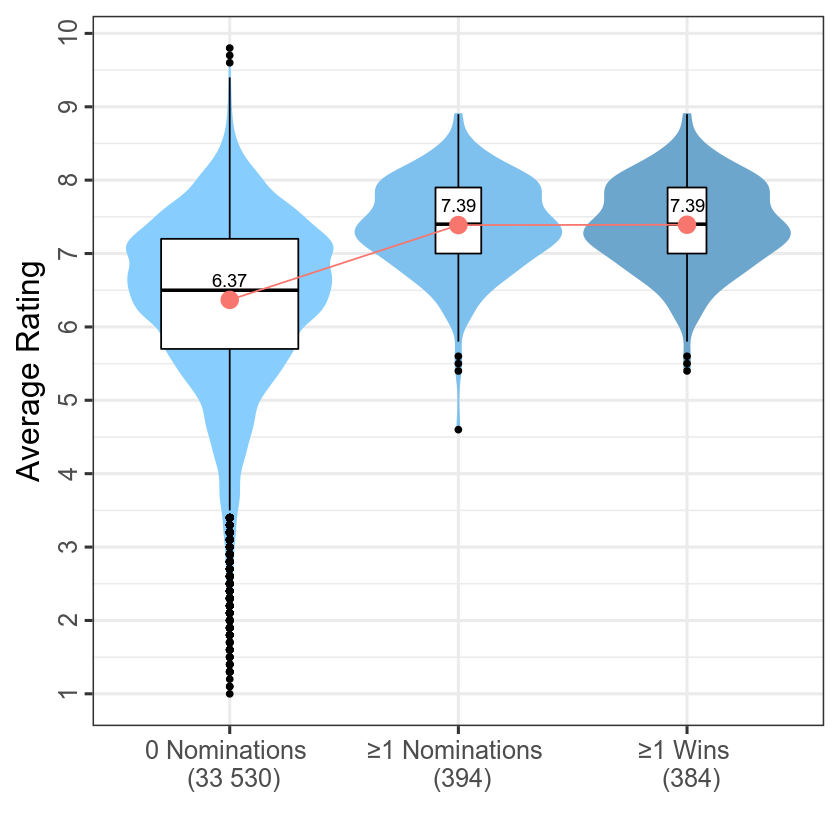

In [182]:
plot_dist

In [183]:
ggsave(plot=plot_dist,file="distribution_ratings_nominations_awards.png",width=10,height=10,dpi=300)

 - movies with nominations and awards have higher ratings!

## How do wins distribute over the genres? 


In [222]:
genres_experiments = title_awards_ratings


In [223]:
genres_winnings = genres_experiments[which(genres_experiments$win_emmy == 1 | genres_experiments$win_gg_film == 1| genres_experiments$win_gg_people == 1),]
nrow(genres_winnings)
head(genres_winnings)

[1] 1913

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,category_emmy,win_emmy,category_gg_film,win_gg_film,category_gg_people,nominee,win_gg_people,averageRating,numVotes
31822,tt0035423,movie,Kate & Leopold,0,2001,118,Comedy,Fantasy,Romance,NA,NA,NA,NA,Best Original Song - Motion Picture,"""Until…"", Sting",1,6.4,78173
33127,tt0036855,movie,Gaslight,0,1944,114,Crime,Drama,Mystery,NA,NA,NA,NA,Actress In A Leading Role,Ingrid Bergman,1,7.8,23884
33143,tt0036872,movie,Going My Way,0,1944,126,Comedy,Drama,Music,NA,NA,Picture,1,Best Performance by an Actor in a Supporting Role in any Motion Picture,Barry Fitzgerald,1,7.0,10302
33144,tt0036872,movie,Going My Way,0,1944,126,Comedy,Drama,Music,NA,NA,Picture,1,Best Director - Motion Picture,Leo McCarey,1,7.0,10302
33341,tt0037096,movie,Mrs. Parkington,0,1944,124,Drama,Romance,0,NA,NA,NA,NA,Best Performance by an Actress in a Supporting Role in any Motion Picture,Agnes Moorehead,1,7.1,1369
33680,tt0037465,movie,Wilson,0,1944,154,Biography,Drama,History,NA,NA,NA,NA,Actor In A Leading Role,Alexander Knox,1,6.4,1411


In [224]:
#let's separate into 1 genre only, 2 genre and 3 genre

In [225]:
genres1_winnings = genres_winnings[which(genres_winnings$genre2 ==0 & genres_winnings$genre3 ==0),]
nrow(genres1_winnings)

[1] 312

In [226]:
genres2_winnings = genres_winnings[which(genres_winnings$genre2 != 0 & genres_winnings$genre3 ==0),]
nrow(genres2_winnings)

[1] 720

In [227]:
genres3_winnings = genres_winnings[which(genres_winnings$genre2 != 0 & genres_winnings$genre3 !=0),]
nrow(genres3_winnings)

[1] 881

In [228]:
genres1_winnings_count_genre1 = genres1_winnings %>% count(genre1)
genres1_winnings_count_genre1 = arrange(genres1_winnings_count_genre1,n)
colnames(genres1_winnings_count_genre1) = c("genre","n_1")


In [229]:
genres2_winnings_count_genre1 = genres2_winnings %>% count(genre1)
colnames(genres2_winnings_count_genre1) = c("genre","n_1")
genres2_winnings_count_genre2 = genres2_winnings %>% count(genre2)
colnames(genres2_winnings_count_genre2) = c("genre","n_2")


genres2 = full_join(genres2_winnings_count_genre1,genres2_winnings_count_genre2,by="genre")
genres2_n = genres2 %>% select(2,3)
genres2_n = rowSums(genres2_n,na.rm=TRUE)

genres2$n = genres2_n
genres2$n_1=NULL
genres2$n_2=NULL
genres2_wins = arrange(genres2,n)

In [230]:
genres3_winnings_count_genre1 = genres3_winnings %>% count(genre1)
colnames(genres3_winnings_count_genre1) = c("genre","n_1")
genres3_winnings_count_genre2 = genres3_winnings %>% count(genre2)
colnames(genres3_winnings_count_genre2) = c("genre","n_2")
genres3_winnings_count_genre3 = genres3_winnings %>% count(genre3)
colnames(genres3_winnings_count_genre3) = c("genre","n_3")

genres1_2 = full_join(genres3_winnings_count_genre1,genres3_winnings_count_genre2,by="genre")
genres3 = full_join(genres1_2,genres3_winnings_count_genre3,by="genre")
genres3_n = genres3 %>% select(2,3,4)
genres3_n = rowSums(genres3_n,na.rm=TRUE)
genres3$n = genres3_n

genres3$n_1=NULL
genres3$n_2=NULL
genres3$n_3=NULL

genres3_wins = arrange(genres3,n)

In [231]:
#join everything together
wins_all_genres_1_2 = full_join(genres1_winnings_count_genre1,genres2_wins,by="genre")
wins_all_genres = full_join(wins_all_genres_1_2, genres3_wins,by="genre")
wins_all_genres

genre,n_1,n.x,n.y
Action,1,19,47
Adult,1,NA,NA
Western,1,9,18
Animation,2,2,28
Horror,2,11,70
Musical,2,11,74
Thriller,5,23,52
Documentary,14,48,14
Comedy,24,94,257
Short,33,254,43


In [232]:
wins_all_genres_count = wins_all_genres
wins_all_genres_n = wins_all_genres_count %>% select(2,3,4)
wins_all_genres_n = rowSums(wins_all_genres_n,na.rm=TRUE)
wins_all_genres_count$n = wins_all_genres_n

wins_all_genres_count$n_1=NULL
wins_all_genres_count$n.x=NULL
wins_all_genres_count$n.y=NULL

wins_all_genres_count = arrange(wins_all_genres_count,n)


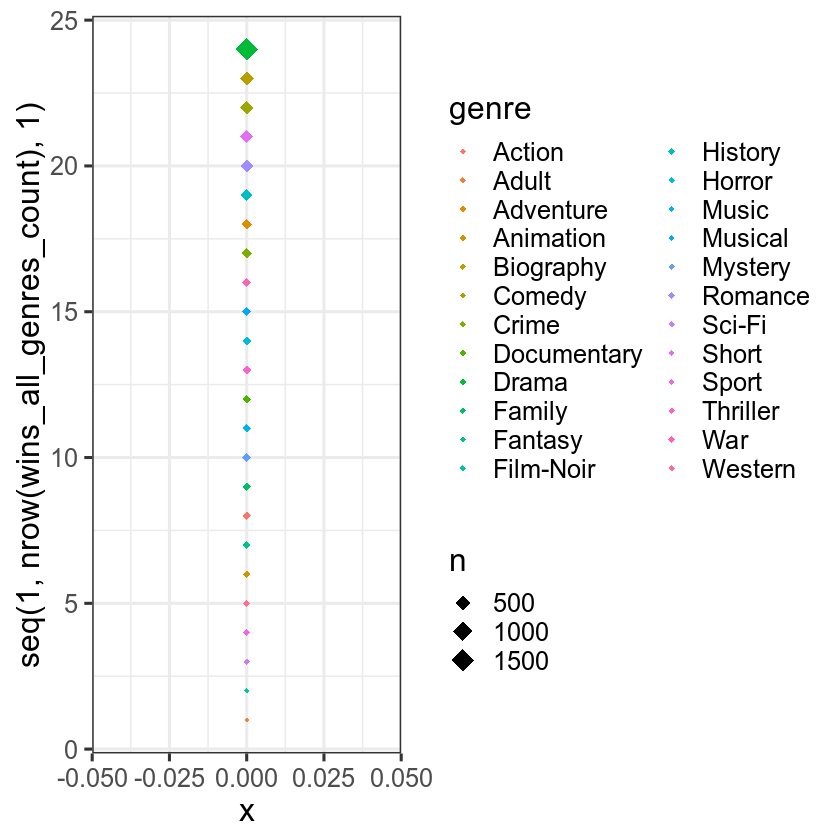

In [233]:
ggplot ()+ 
geom_point(shape=18,data=wins_all_genres_count, 
           aes(x=0,y=seq(1,nrow(wins_all_genres_count),1),
               size=n,colour=genre))  +
theme_bw(base_size = 19)


 - let's try another visualization

In [234]:
label_genre = wins_all_genres_count
label_genre$id = seq(1,nrow(label_genre))
label_genre$labels = paste("  ",label_genre$genre," ",label_genre$n,"  ")
nbars = nrow(label_genre)
nbars
angle = 90 - 360 * (label_genre$id) / nbars
angle

[1] 24

[1]   75   60   45   30   15    0  -15  -30  -45  -60  -75  -90 -105 -120 -135
[16] -150 -165 -180 -195 -210 -225 -240 -255 -270

In [235]:
label_genre$hjust<-ifelse(angle < -90, 1, 0)
label_genre$angle<-ifelse(angle < -90, angle+180, angle)

Only 26 colors are available with 'alphabet'
Only 26 colors are available with 'alphabet2'
Only 25 colors are available with 'cols25'.
Only 32 colors are available with 'glasbey'.
Only 22 colors are available with 'kelly'.
Only 36 colors are available with 'polychrome'.
Only 24 colors are available with 'stepped'
Only 12 colors are available with 'tol'
Only 16 colors are available with 'watlington'.


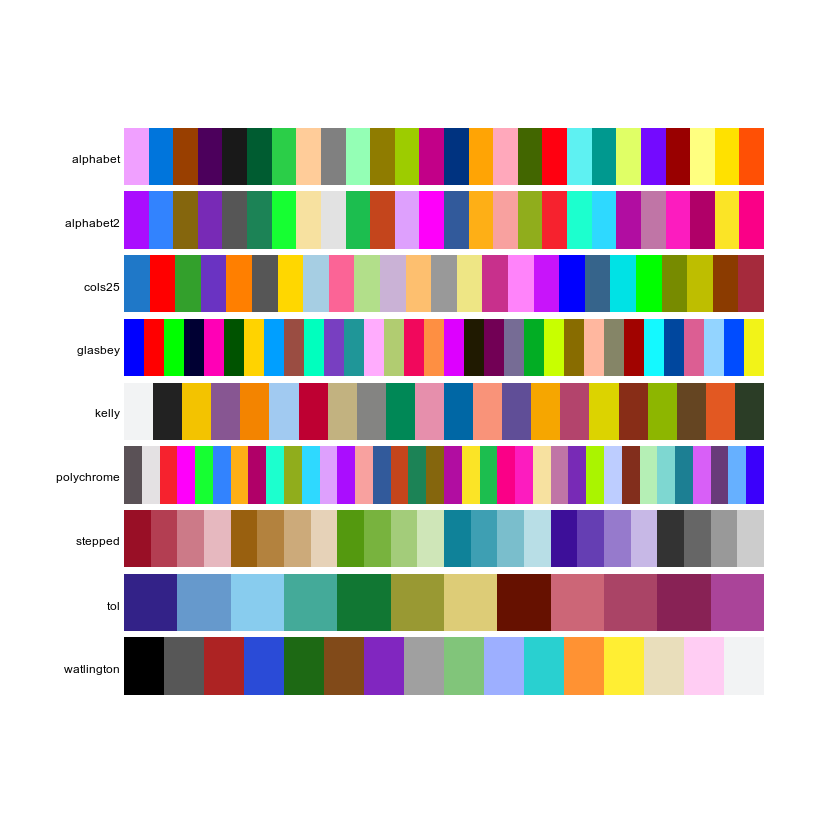

In [236]:
library(pals)
pal.bands(alphabet, alphabet2, cols25, glasbey, kelly, polychrome, 
  stepped, tol, watlington,
  show.names=FALSE)

In [240]:
total_genres_plot = ggplot(wins_all_genres_count,aes(x=reorder(genre, n),y=n,fill=factor(genre))) +
geom_bar(stat="identity",show.legend=FALSE)+#,fill=alpha("skyblue3",0.5)) + 
scale_fill_manual(values=as.vector(stepped(24)))+
ylim(-300,2100)+
theme_minimal()+
theme(plot.title=element_text(),
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm"))+
coord_polar(start = 0)+
geom_text(data=label_genre, aes(x=seq(1,nrow(wins_all_genres_count)), y=n+10, label=labels, hjust=hjust), 
                                color="black", size=2.3, angle= label_genre$angle, inherit.aes = FALSE)+
geom_text(aes(x=-1, y=2100, label="Winning awards genres (combined)"), color="black", inherit.aes = FALSE)


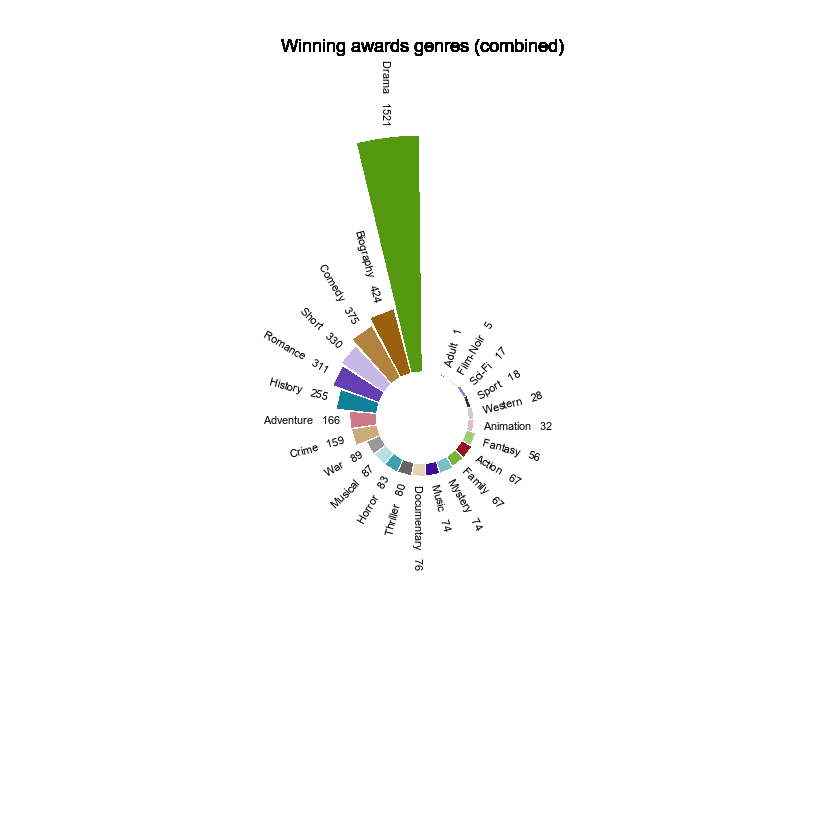

In [241]:
total_genres_plot

In [244]:
ggsave(plot=total_genres_plot,file="winning_awards_genres_total.png",width=7,height=10,dpi=300)

 - let's separate the previous plot bars into different bars per gender: movies with only 1 gender, 2 or 3

In [245]:
all_wins = wins_all_genres

In [246]:
total = all_wins %>% select(2,3,4)
total = rowSums(total,na.rm=TRUE)
all_wins$total = total

In [247]:
colnames(all_wins) = c("genre","n_1","n_2","n_3","total")
all_wins = arrange(all_wins,total)
all_wins[is.na(all_wins)] <- 0
all_wins

genre,n_1,n_2,n_3,total
Adult,1,0,0,1
Film-Noir,0,2,3,5
Sci-Fi,0,1,16,17
Sport,0,11,7,18
Western,1,9,18,28
Animation,2,2,28,32
Fantasy,0,13,43,56
Action,1,19,47,67
Family,0,20,47,67
Mystery,0,4,70,74


In [248]:
label_genre = all_wins
label_genre$id = seq(1,nrow(label_genre))
label_genre$labels = paste("  ",label_genre$genre," ",label_genre$total,"  ")
nbars = nrow(label_genre)
angle = 90 - 360 * (label_genre$id) / nbars
label_genre$hjust<-ifelse(angle < -90, 1, 0)
label_genre$angle<-ifelse(angle < -90, angle+180, angle)

In [249]:
genres_in_awards =ggplot() + 
geom_bar(data = all_wins, aes(x=reorder(genre, total),y=n_1+n_2+n_3,fill="One genre"), stat="identity") + 
geom_bar(data = all_wins, aes(x=reorder(genre, total),y=n_1+n_2,fill="Two genre"), stat="identity") + 
geom_bar(data = all_wins, aes(x=reorder(genre, total),y=n_1,fill="Three genre"), stat="identity") + 
scale_fill_manual(values=c("#D72631","#077B8A","#5C3C92"))+
ylim(-300,2100)+
theme_bw()+
theme(plot.title=element_text(),
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    legend.position = c(0.75, 0.5),
    plot.margin = unit(rep(-2,4), "cm"))+labs(fill = "Legend")+
coord_polar(start = 0)+
geom_text(data=label_genre, aes(x=seq(1,nrow(all_wins)), y=total+10, label=labels, hjust=hjust), 
                                color="black", size=2.3, angle= label_genre$angle, inherit.aes = FALSE)+
geom_text(aes(x=-1, y=2100, label="Number of genres in winning awards"), color="black", inherit.aes = FALSE)

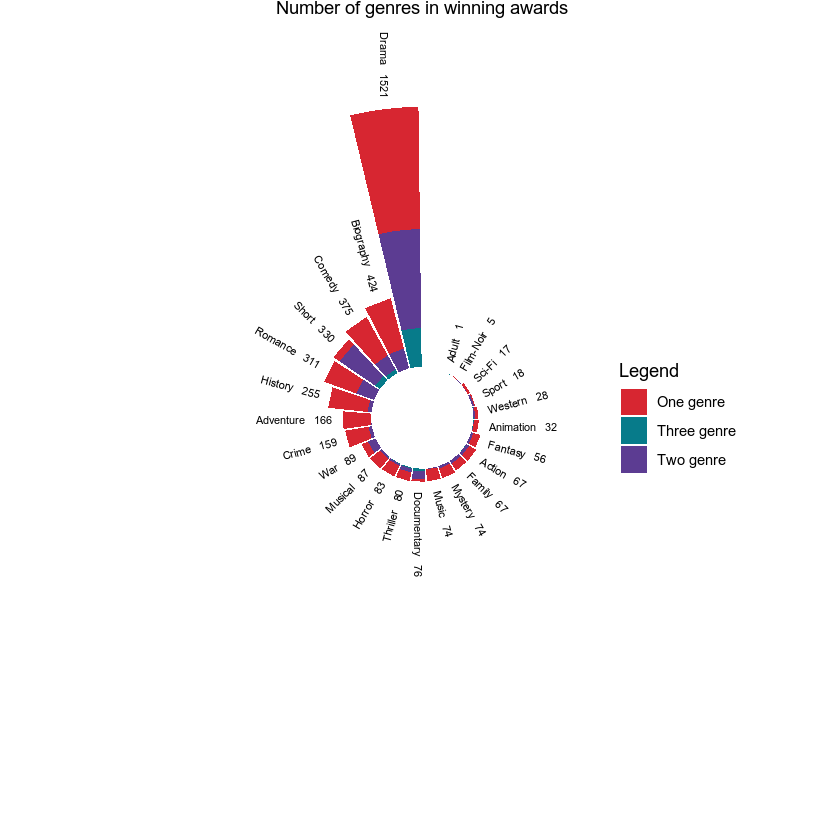

In [250]:
genres_in_awards

In [251]:
ggsave(plot=genres_in_awards,file="genres_in_winning_awards.png",width=7,height=10,dpi=300)

 - now let's separate into first gender, second gender and third gender

In [252]:
copy_genres_winnings = genres_winnings

In [253]:
all_gender_winnings_columns = copy_genres_winnings %>% select(genre1,genre2,genre3)
head(all_gender_winnings_columns)

,genre1,genre2,genre3
31822,Comedy,Fantasy,Romance
33127,Crime,Drama,Mystery
33143,Comedy,Drama,Music
33144,Comedy,Drama,Music
33341,Drama,Romance,0
33680,Biography,Drama,History


In [254]:
all_wins$genre

[1] Adult       Film-Noir   Sci-Fi      Sport       Western     Animation  
 [7] Fantasy     Action      Family      Mystery     Music       Documentary
[13] Thriller    Horror      Musical     War         Crime       Adventure  
[19] History     Romance     Short       Comedy      Biography   Drama      
29 Levels: Action Adult Adventure Animation Biography Comedy ... 0

In [255]:
first_gender_counts = all_gender_winnings_columns %>% count(genre1)
colnames(first_gender_counts) = c("genre","first_genre")
second_gender_counts = all_gender_winnings_columns %>% count(genre2)
colnames(second_gender_counts) = c("genre","second_genre")
third_gender_counts = all_gender_winnings_columns %>% count(genre3)
colnames(third_gender_counts) = c("genre","third_genre")

In [256]:
first_second_gender_counts = full_join(first_gender_counts,second_gender_counts,by="genre")
first_second_third_gender_counts = full_join(first_second_gender_counts,third_gender_counts,by="genre")
first_second_third_gender_counts[is.na(first_second_third_gender_counts)] <- 0
total = first_second_third_gender_counts %>% select(2,3,4)
total = rowSums(total,na.rm=TRUE)
first_second_third_gender_counts$total = total
first_second_third_gender_counts = first_second_third_gender_counts[first_second_third_gender_counts$genre!=0,]
first_second_third_gender_counts

,genre,first_genre,second_genre,third_genre,total
1,Action,67,0,0,67
2,Adult,1,0,0,1
3,Adventure,135,31,0,166
4,Animation,11,18,3,32
5,Biography,417,7,0,424
6,Comedy,263,98,14,375
7,Crime,94,64,1,159
8,Documentary,67,7,2,76
9,Drama,778,645,98,1521
10,Family,14,37,16,67


In [257]:
label_genre = first_second_third_gender_counts
label_genre = arrange(label_genre,total)
label_genre$id = seq(1,nrow(label_genre))
label_genre$labels = paste("  ",label_genre$genre," ",label_genre$total,"  ")
nbars = nrow(label_genre)
angle = 90 - 360 * (label_genre$id) / nbars
label_genre$hjust<-ifelse(angle < -90, 1, 0)
label_genre$angle<-ifelse(angle < -90, angle+180, angle)

In [258]:
genres_per_winning_awards = ggplot()+
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre+second_genre+third_genre,fill="Third Gender"),stat="identity")+
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre+second_genre,fill="Second Genre"), stat="identity") +
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre,fill="First Genre"),stat="identity") +
scale_fill_manual(values=c("#1e3d59","#f5f0e1","#ff6e40"))+
ylim(-300,2100)+
theme_bw()+
theme(plot.title=element_text(),
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    legend.position = c(0.75, 0.5),
    plot.margin = unit(rep(-2,4), "cm"))+labs(fill = "Legend")+
coord_polar(start = 0)+
geom_text(data=label_genre, aes(x=seq(1,nrow(first_second_third_gender_counts)), y=total+10, label=labels, hjust=hjust), 
                                color="black", size=2.3, angle= label_genre$angle, inherit.aes = FALSE)+
geom_text(aes(x=-1, y=2100, label="Genres per winnings awards"), color="black", inherit.aes = FALSE)


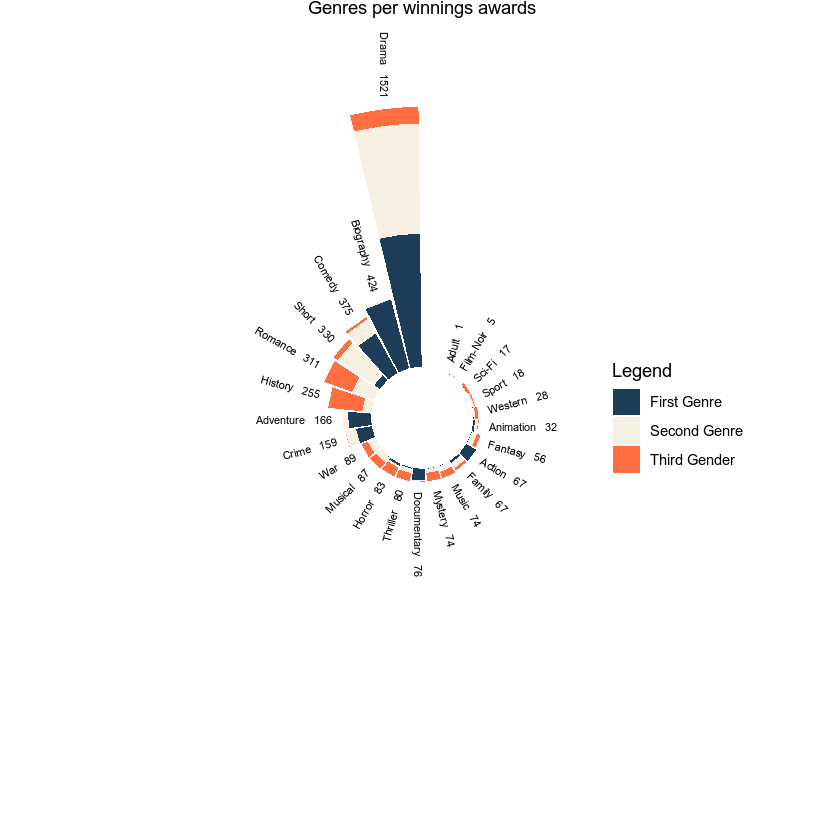

In [259]:
genres_per_winning_awards

In [261]:
ggsave(plot=genres_per_winning_awards,file="genres_per_winning_awards.png",width=7,height=10,dpi=300)

### Now let's divide this into types of awards - emmys, gg_people, gg_film!

In [262]:
head(genres_experiments)

tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3,category_emmy,win_emmy,category_gg_film,win_gg_film,category_gg_people,nominee,win_gg_people,averageRating,numVotes
tt0000001,short,Carmencita,0,1894,1,Documentary,Short,0,NA,NA,NA,NA,NA,NA,NA,5.6,1654
tt0000002,short,Le clown et ses chiens,0,1892,5,Animation,Short,0,NA,NA,NA,NA,NA,NA,NA,6.1,199
tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,Comedy,Romance,NA,NA,NA,NA,NA,NA,NA,6.5,1366
tt0000004,short,Un bon bock,0,1892,12,Animation,Short,0,NA,NA,NA,NA,NA,NA,NA,6.2,121
tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,Short,0,NA,NA,NA,NA,NA,NA,NA,6.2,2149
tt0000006,short,Chinese Opium Den,0,1894,1,Short,0,0,NA,NA,NA,NA,NA,NA,NA,5.3,115


In [263]:
genres_winnings_emmys = genres_experiments[which(genres_experiments$win_emmy == 1),]
genres_winnings_gg_people = genres_experiments[which(genres_experiments$win_gg_people == 1),]
genres_winnings_gg_film = genres_experiments[which(genres_experiments$win_gg_film == 1),]

In [268]:
copy_genres_winnings = genres_winnings_emmys
all_gender_winnings_columns = copy_genres_winnings %>% select(genre1,genre2,genre3)
first_gender_counts = all_gender_winnings_columns %>% count(genre1)
colnames(first_gender_counts) = c("genre","first_genre")
second_gender_counts = all_gender_winnings_columns %>% count(genre2)
colnames(second_gender_counts) = c("genre","second_genre")
third_gender_counts = all_gender_winnings_columns %>% count(genre3)
colnames(third_gender_counts) = c("genre","third_genre")
first_second_gender_counts = full_join(first_gender_counts,second_gender_counts,by="genre")
first_second_third_gender_counts = full_join(first_second_gender_counts,third_gender_counts,by="genre")
first_second_third_gender_counts[is.na(first_second_third_gender_counts)] <- 0
total = first_second_third_gender_counts %>% select(2,3,4)
total = rowSums(total,na.rm=TRUE)
first_second_third_gender_counts$total = total
first_second_third_gender_counts = first_second_third_gender_counts[first_second_third_gender_counts$genre!=0,]
label_genre = first_second_third_gender_counts
label_genre = arrange(label_genre,total)
label_genre$id = seq(1,nrow(label_genre))
label_genre$labels = paste("  ",label_genre$genre," ",label_genre$total,"  ")
nbars = nrow(label_genre)
angle = 90 - 360 * (label_genre$id) / nbars
label_genre$hjust<-ifelse(angle < -90, 1, 0)
label_genre$angle<-ifelse(angle < -90, angle+180, angle)
emmys_genres_wins = ggplot()+
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre+second_genre+third_genre,fill="Third Gender"),stat="identity")+
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre+second_genre,fill="Second Genre"), stat="identity") +
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre,fill="First Genre"),stat="identity") +
scale_fill_manual(values=c("#1e3d59","#f5f0e1","#ff6e40"))+
ylim(-100,600)+
theme_bw()+
theme(plot.title=element_text(),
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    legend.position = c(0.8, 0.5),
    plot.margin = unit(rep(-2,4), "cm"))+labs(fill = "Legend")+
coord_polar(start = 0)+
geom_text(data=label_genre, aes(x=seq(1,nrow(first_second_third_gender_counts)), y=total+10, label=labels, hjust=hjust), 
                                color="black", size=2.3, angle= label_genre$angle, inherit.aes = FALSE)+
geom_text(aes(x=-1, y=600, label="Genres per Emmy winning awards"), color="black", inherit.aes = FALSE)

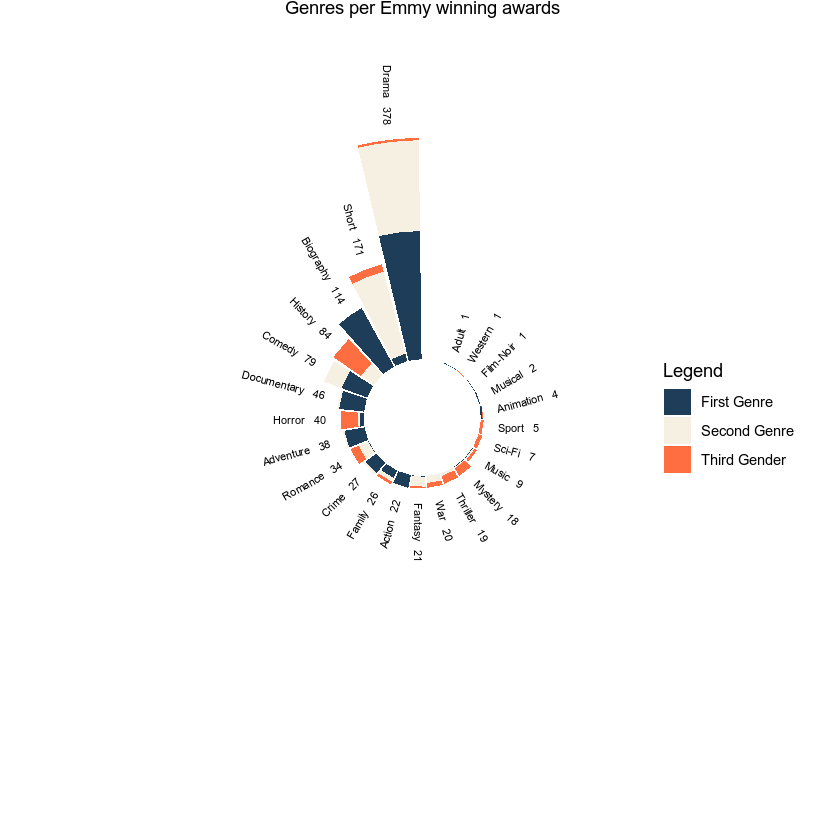

In [269]:
emmys_genres_wins

In [270]:
ggsave(plot=emmys_genres_wins,file="genres_per_emmy_winning_awards.png",width=7,height=10,dpi=300)

In [271]:
copy_genres_winnings = genres_winnings_gg_people
all_gender_winnings_columns = copy_genres_winnings %>% select(genre1,genre2,genre3)
first_gender_counts = all_gender_winnings_columns %>% count(genre1)
colnames(first_gender_counts) = c("genre","first_genre")
second_gender_counts = all_gender_winnings_columns %>% count(genre2)
colnames(second_gender_counts) = c("genre","second_genre")
third_gender_counts = all_gender_winnings_columns %>% count(genre3)
colnames(third_gender_counts) = c("genre","third_genre")
first_second_gender_counts = full_join(first_gender_counts,second_gender_counts,by="genre")
first_second_third_gender_counts = full_join(first_second_gender_counts,third_gender_counts,by="genre")
first_second_third_gender_counts[is.na(first_second_third_gender_counts)] <- 0
total = first_second_third_gender_counts %>% select(2,3,4)
total = rowSums(total,na.rm=TRUE)
first_second_third_gender_counts$total = total
first_second_third_gender_counts = first_second_third_gender_counts[first_second_third_gender_counts$genre!=0,]
label_genre = first_second_third_gender_counts
label_genre = arrange(label_genre,total)
label_genre$id = seq(1,nrow(label_genre))
label_genre$labels = paste("  ",label_genre$genre," ",label_genre$total,"  ")
nbars = nrow(label_genre)
angle = 90 - 360 * (label_genre$id) / nbars
label_genre$hjust<-ifelse(angle < -90, 1, 0)
label_genre$angle<-ifelse(angle < -90, angle+180, angle)
gg_people_genres_wins = ggplot()+
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre+second_genre+third_genre,fill="Third Gender"),stat="identity")+
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre+second_genre,fill="Second Genre"), stat="identity") +
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre,fill="First Genre"),stat="identity") +
scale_fill_manual(values=c("#1e3d59","#f5f0e1","#ff6e40"))+
ylim(-200,1100)+
theme_bw()+
theme(plot.title=element_text(),
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    legend.position = c(0.8, 0.5),
    plot.margin = unit(rep(-2,4), "cm"))+labs(fill = "Legend")+
coord_polar(start = 0)+
geom_text(data=label_genre, aes(x=seq(1,nrow(first_second_third_gender_counts)), y=total+10, label=labels, hjust=hjust), 
                                color="black", size=2.3, angle= label_genre$angle, inherit.aes = FALSE)+
geom_text(aes(x=-1, y=1100, label="Genres per Golden Globes - people - winning awards"), color="black", inherit.aes = FALSE)

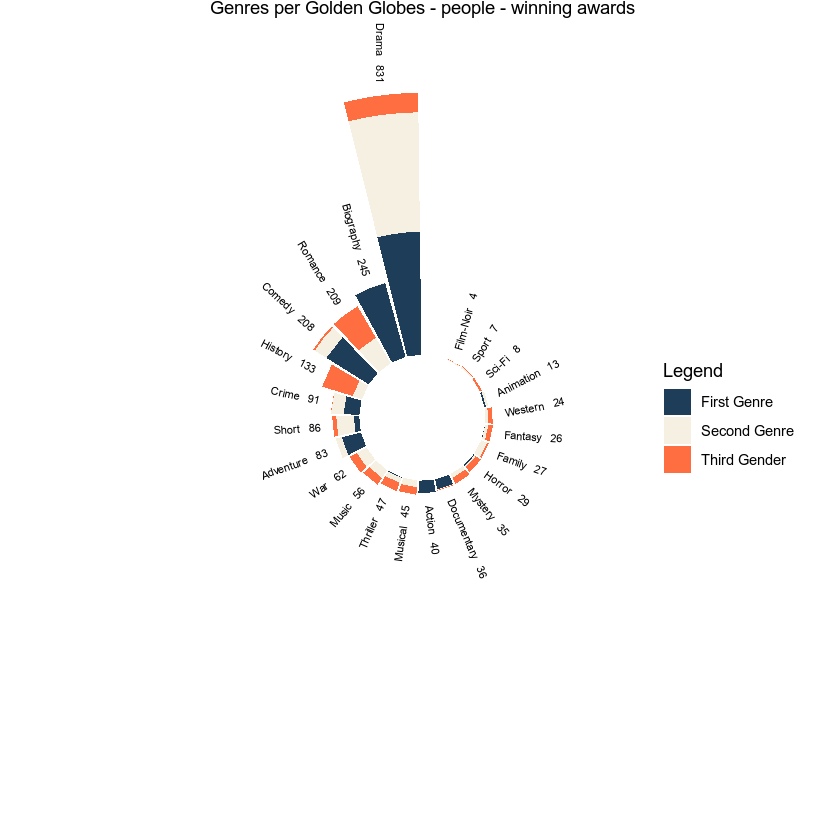

In [272]:
gg_people_genres_wins

In [273]:
ggsave(plot=gg_people_genres_wins,file="genres_per_ggpeople_winning_awards.png",width=7,height=10,dpi=300)

In [276]:
copy_genres_winnings = genres_winnings_gg_film
all_gender_winnings_columns = copy_genres_winnings %>% select(genre1,genre2,genre3)
first_gender_counts = all_gender_winnings_columns %>% count(genre1)
colnames(first_gender_counts) = c("genre","first_genre")
second_gender_counts = all_gender_winnings_columns %>% count(genre2)
colnames(second_gender_counts) = c("genre","second_genre")
third_gender_counts = all_gender_winnings_columns %>% count(genre3)
colnames(third_gender_counts) = c("genre","third_genre")
first_second_gender_counts = full_join(first_gender_counts,second_gender_counts,by="genre")
first_second_third_gender_counts = full_join(first_second_gender_counts,third_gender_counts,by="genre")
first_second_third_gender_counts[is.na(first_second_third_gender_counts)] <- 0
total = first_second_third_gender_counts %>% select(2,3,4)
total = rowSums(total,na.rm=TRUE)
first_second_third_gender_counts$total = total
first_second_third_gender_counts = first_second_third_gender_counts[first_second_third_gender_counts$genre!=0,]
label_genre = first_second_third_gender_counts
label_genre = arrange(label_genre,total)
label_genre$id = seq(1,nrow(label_genre))
label_genre$labels = paste("  ",label_genre$genre," ",label_genre$total,"  ")
nbars = nrow(label_genre)
angle = 90 - 360 * (label_genre$id) / nbars
label_genre$hjust<-ifelse(angle < -90, 1, 0)
label_genre$angle<-ifelse(angle < -90, angle+180, angle)
gg_film_genres_wins = ggplot()+
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre+second_genre+third_genre,fill="Third Gender"),stat="identity")+
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre+second_genre,fill="Second Genre"), stat="identity") +
geom_bar(data = first_second_third_gender_counts, aes(x=reorder(genre,total),y=first_genre,fill="First Genre"),stat="identity") +
scale_fill_manual(values=c("#1e3d59","#f5f0e1","#ff6e40"))+
ylim(-200,1000)+
theme_bw()+
theme(plot.title=element_text(),
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    legend.position = c(0.8, 0.5),
    plot.margin = unit(rep(-2,4), "cm"))+labs(fill = "Legend")+
coord_polar(start = 0)+
geom_text(data=label_genre, aes(x=seq(1,nrow(first_second_third_gender_counts)), y=total+10, label=labels, hjust=hjust), 
                                color="black", size=2.3, angle= label_genre$angle, inherit.aes = FALSE)+
geom_text(aes(x=-1, y=1000, label="Genres per Golden Globes - film - winning awards"), color="black", inherit.aes = FALSE)

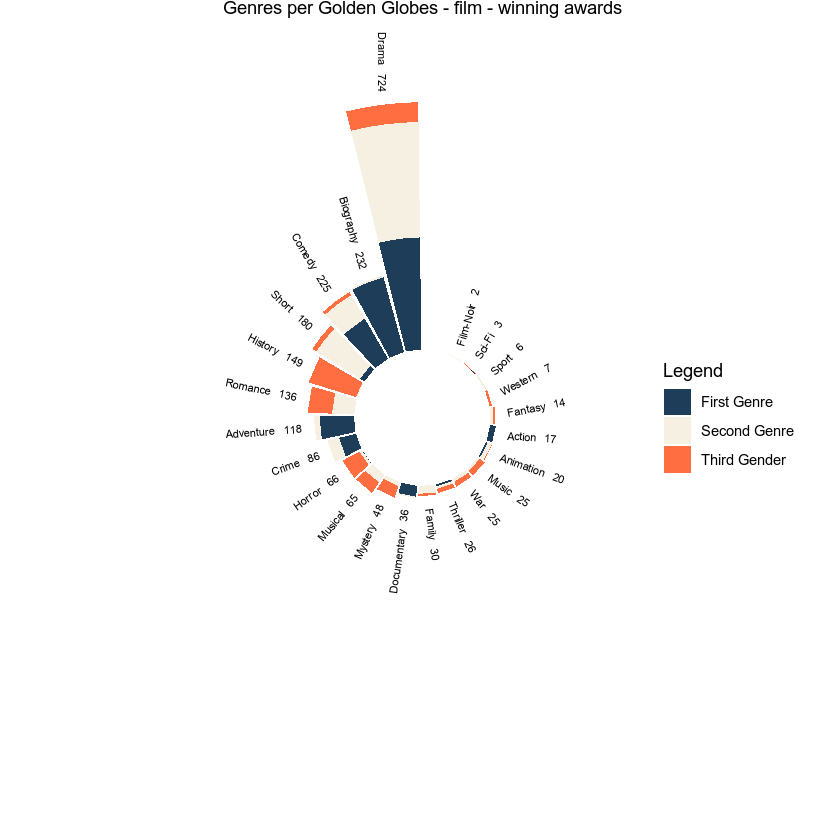

In [277]:
gg_film_genres_wins

In [278]:
ggsave(plot=gg_film_genres_wins,file="genres_per_ggfilm_winning_awards.png",width=7,height=10,dpi=300)